In [1]:
import pandas as pd

import numpy as np

In [2]:
import matplotlib.pyplot as plt
import gender_guesser.detector as gender
import matplotlib

%matplotlib inline

In [3]:
df = pd.read_csv('WiM_data/publications_in_psychology.csv')

In [4]:
d = gender.Detector(case_sensitive=False)

In [5]:
def get_gender_of_author(row):
    if row['source'] == 'Springer':
        return d.get_gender(row['author'].split(' ')[-1])
    return d.get_gender(row['author'].split(' ')[0])

In [6]:
df["gender"] = df.apply(
    get_gender_of_author, axis=1
)

In [7]:
len(df.unique_key.unique())

10169

In [8]:
len(df.author.unique())

23740

In [9]:
gender = df[['author', 'gender']].drop_duplicates()

In [10]:
pd.DataFrame(gender.groupby("gender").count()['author'].sort_values())

,author
gender,
mostly_male,288
mostly_female,404
andy,1117
male,5108
female,6626
unknown,10197


In [11]:
num_authors = pd.DataFrame(df.groupby(['unique_key', 'author'], as_index=False
                             ).size().groupby(['unique_key']).count())

In [12]:
num_authors = num_authors.rename(columns={0: 'num_authors'}).reset_index()

In [13]:
df = pd.merge(df, num_authors, on=['unique_key'], how='inner')

In [14]:
grouped = df.groupby(['unique_key', 'gender'], as_index=False
                             ).count()

In [15]:
def get_number_of_genders_per_article(df, grouped):
    
    for gender in ['female', 'male', 'mostly_female', 'mostly_male']:
        gender_counts = grouped[grouped['gender'] == gender][['unique_key','title']]
        gender_counts = gender_counts.rename(columns={'title':'%s_count' % gender})
        
        df = pd.merge(df, gender_counts, on=['unique_key'], how='outer')
    
    df = df.fillna(0)
    df['female_authors'] = df['female_count'] + df['mostly_female_count']
    df['male_authors'] = df['male_count'] + df['mostly_male_count']
        
    return df

In [16]:
df = get_number_of_genders_per_article(df, grouped)

In [17]:
def get_female_ratio(row):
    return row['female_authors'] / row['num_authors']
def get_male_ratio(row):
    return row['male_authors'] / row['num_authors']

In [18]:
df = df[~(df['num_authors'] == 0)]

In [19]:
df["female_ratio"] = df.apply(
    get_female_ratio, axis=1
)

In [20]:
df["male_ratio"] = df.apply(
    get_male_ratio, axis=1
)

In [21]:
df["female_ratio"].describe()

count    30125.000000
mean         0.287867
std          0.307164
min          0.000000
25%          0.000000
50%          0.250000
75%          0.500000
max          1.000000
Name: female_ratio, dtype: float64

In [22]:
df["male_ratio"].describe()

count    30125.000000
mean         0.239967
std          0.291851
min          0.000000
25%          0.000000
50%          0.166667
75%          0.400000
max          1.000000
Name: male_ratio, dtype: float64

In [23]:
color = matplotlib.cm.plasma(np.linspace(0, 1, 1))

In [24]:
papers = df.drop_duplicates(subset='unique_key', keep="last")

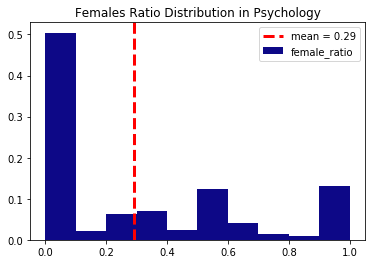

In [28]:
fig, ax = plt.subplots();
plt.title('Females Ratio Distribution in Psychology')

weights = np.ones_like(papers['female_ratio']) / float(len(papers['female_ratio']))
ax.hist(papers['female_ratio'], color=color, weights=weights);
ax.axvline(np.mean(papers['female_ratio']), c='red',
           label ="mean = %s" %round(np.mean(papers['female_ratio']), 3),
           linestyle='--', linewidth=3);

plt.legend();

plt.savefig('../src/www/Nikoleta-v3.github.io/assets/images/female_ratio_distribution_psychology.png')

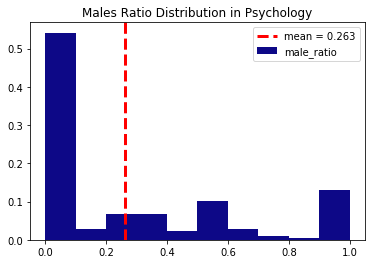

In [30]:
fig, ax = plt.subplots();
plt.title('Males Ratio Distribution in Psychology')

weights = np.ones_like(papers['male_ratio']) / float(len(papers['male_ratio']))
ax.hist(papers['male_ratio'], color=color, weights=weights);
ax.axvline(np.mean(papers['male_ratio']), c='red',
           label ="mean = %s" %round(np.mean(papers['male_ratio']), 3),
           linestyle='--', linewidth=3);

plt.legend();

plt.savefig('../src/www/Nikoleta-v3.github.io/assets/images/male_ratio_distribution_psychology.png')

In [31]:
df = df.drop(columns=['index', "female_count", "male_count", "mostly_female_count", "mostly_male_count"])

In [32]:
df.to_csv('WiM_data/publications_in_psychology.csv')